# GreenSort: Computer Vision for Waste Classification

## Domain Proyek

Klasifikasi sampah menggunakan computer vision merupakan salah satu solusi teknologi yang penting dalam mengatasi permasalahan pengelolaan sampah global. Dengan volume sampah yang terus meningkat setiap tahunnya, diperlukan sistem yang efisien untuk mengidentifikasi dan memilah berbagai jenis sampah secara otomatis.

GreenSort adalah sistem klasifikasi sampah berbasis computer vision yang bertujuan memfasilitasi proses jual-beli sampah antara pengguna dan perantara/admin, yang kemudian akan menjualnya kembali ke industri daur ulang. Sistem ini memungkinkan pengguna untuk memfoto sampah, mengklasifikasikannya secara otomatis, dan mendapatkan estimasi harga berdasarkan jenis dan jumlahnya.

Kasus ini perlu diselesaikan karena:
1. Pengelolaan sampah yang tepat merupakan tantangan lingkungan global
2. Proses manual memilah sampah memakan waktu dan tidak efisien
3. Pendekatan berbasis teknologi dapat meningkatkan tingkat daur ulang dan mengurangi sampah yang berakhir di TPA
4. Menciptakan nilai ekonomi dari sampah dapat mendorong masyarakat untuk berpartisipasi dalam pengelolaan sampah

[An image classification dataset of waste items across 9 major material types, collected within an authentic landfill environment.](https://archive.ics.uci.edu/dataset/908/realwaste)

## Business Understanding

### Problem Statements

1. Bagaimana mengembangkan sistem klasifikasi sampah yang akurat menggunakan computer vision untuk mengidentifikasi 9 kategori sampah berbeda?
2. Bagaimana mengimplementasikan model klasifikasi yang dapat dijalankan di browser untuk memudahkan akses pengguna tanpa memerlukan infrastruktur server yang kompleks?
3. Bagaimana cara mengintegrasikan model computer vision dengan sistem estimasi harga dan perhitungan biaya pengiriman?

### Goals

1. Mengembangkan model klasifikasi sampah dengan akurasi minimal 85% untuk 9 kategori sampah dalam dataset RealWaste.
2. Mengkonversi model machine learning menjadi format TensorFlow.js yang dapat dijalankan di browser dengan performa yang tetap optimal.
3. Merancang sistem untuk estimasi harga otomatis berdasarkan jenis sampah, jumlah, dan opsi pengiriman.

### Solution Statements

1. Mengembangkan model deep learning berbasis CNN dengan dua pendekatan:
   - Menggunakan arsitektur CNN custom yang dirancang khusus untuk klasifikasi sampah
   - Menggunakan transfer learning dengan pre-trained models seperti MobileNetV2, EfficientNet, ResNet50, atau inceptionv3 yang dioptimalkan untuk perangkat dengan komputasi terbatas

2. Meningkatkan performa model dengan:
   - Data augmentation untuk memperkaya dataset
   - Hyperparameter tuning untuk mengoptimalkan model
   - Teknik ensemble learning untuk meningkatkan akurasi prediksi

3. Mengkonversi model menjadi format TensorFlow.js dengan:
   - Optimasi model melalui model pruning dan quantization untuk mengurangi ukuran model
   - Implementasi caching model di browser untuk penggunaan offline

## Data Understanding

Dataset yang digunakan dalam proyek ini adalah dataset RealWaste yang tersedia di UCI Machine Learning Repository: [RealWaste Dataset](https://archive.ics.uci.edu/dataset/908/realwaste).

Dataset ini berisi gambar sampah yang diklasifikasikan ke dalam 9 kategori:
1. Cardboard (Kardus)
2. Food Organics (Sampah Organik Makanan)
3. Glass (Kaca)
4. Metal (Logam)
5. Miscellaneous Trash (Sampah Campuran)
6. Paper (Kertas)
7. Plastic (Plastik)
8. Textile Trash (Sampah Tekstil)
9. Vegetation (Sampah Tumbuhan)

In [4]:
!pip install tensorflowjs
!pip uninstall tensorflow --yes
!pip install tensorflow==2.15.1

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Using cached jax-0.5.3-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.3-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached jax-0.5.2-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.1-cp310-cp310-manylinux2014_x86_64.whl.metadata (978 bytes)
  Using cached jax-0.5.1-py3-none-any.whl.metadata (22 kB)
  Using cached jax-0.5.0-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.0-cp310-cp310-manylinux2014_x86_64.whl.metadata (978 bytes)
  Using cached jax-0.4.38-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.38-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.0 kB)
  Using cached jax-0.4.37-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.36-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.0 kB)
  Using cached jax-0.4.36-py3-none-any.whl.metadata (22 kB)
INFO: pip is still lo

### Eksplorasi Dataset

In [1]:
import tensorflow as tf
import keras

print("Versi TensorFlow:", tf.__version__)

# Cek ketersediaan GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU terdeteksi:", physical_devices)
else:
    print("GPU tidak terdeteksi.")
    
print("Versi Keras:", keras.__version__)

2025-05-29 17:28:38.878490: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 17:28:38.896679: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748514518.913336  107076 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748514518.918362  107076 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748514518.937860  107076 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Versi TensorFlow: 2.19.0
GPU terdeteksi: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Versi Keras: 3.9.0


/home/bayuardiyansyah/anaconda3/envs/tensorflowjs/lib/python3.10/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.4)
  from scipy.stats import gaussian_kde
2025-05-29 19:12:12.958909: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-29 19:12:12.984169: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-29 19:12:12.984202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-29 19:12:12.984985:

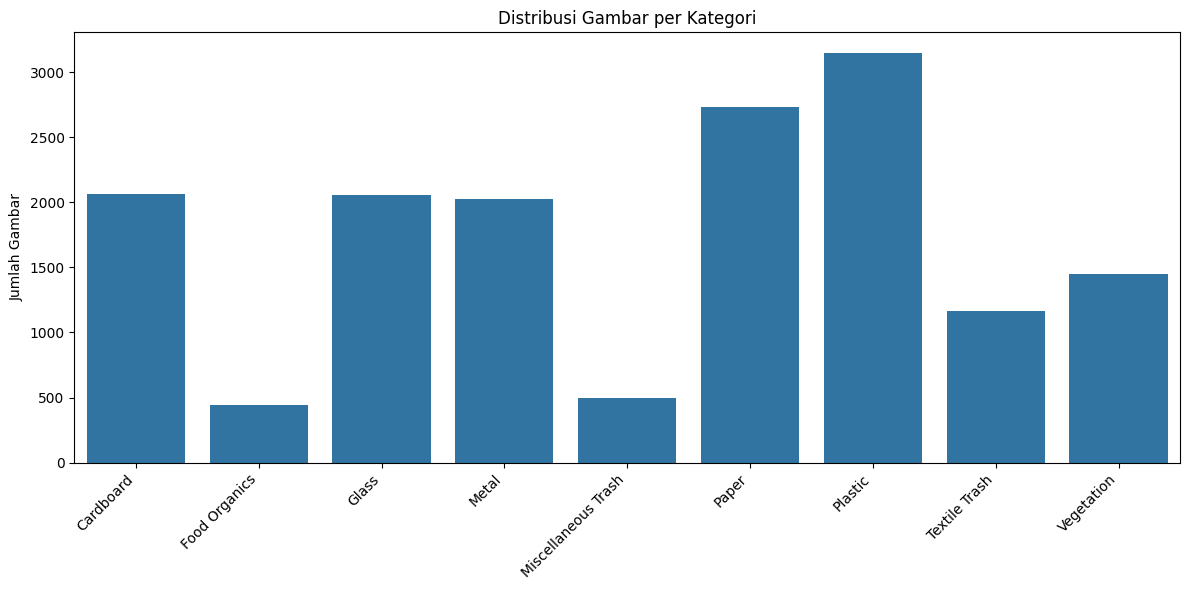

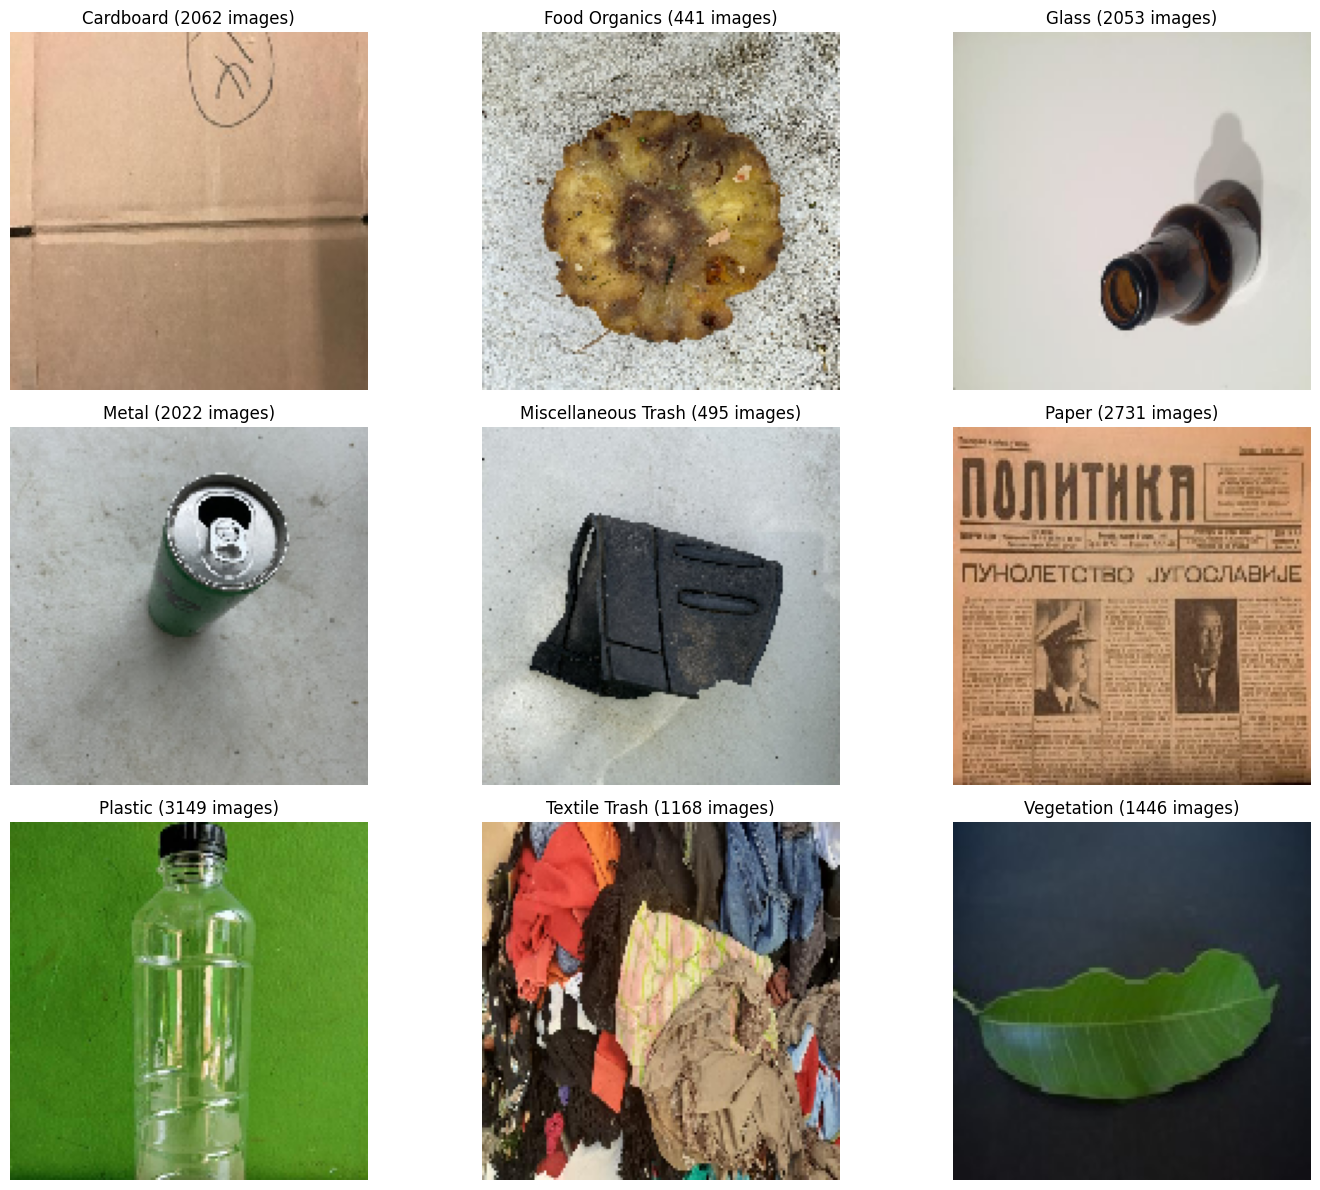

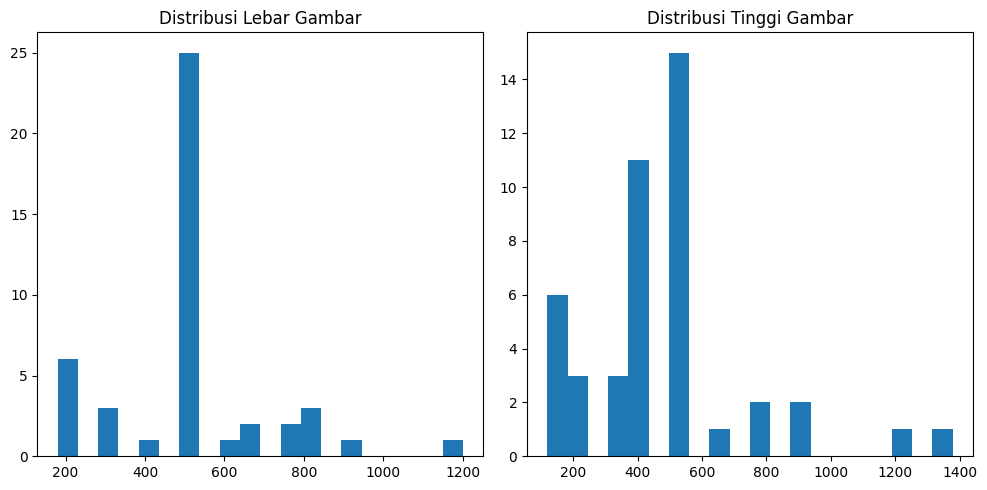

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import os


# Path ke dataset
dataset_path = "../ComputerVision/realwaste-main/RealWaste"
categories = ['Cardboard', 'Food Organics', 'Glass', 'Metal',
              'Miscellaneous Trash', 'Paper', 'Plastic',
              'Textile Trash', 'Vegetation']

# Menghitung jumlah gambar per kategori
counts = {}
for category in categories:
    category_path = os.path.join(dataset_path, category)
    counts[category] = len(os.listdir(category_path))

# Visualisasi distribusi data
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Gambar per Kategori')
plt.ylabel('Jumlah Gambar')
plt.tight_layout()
plt.show()

# Menampilkan contoh gambar dari setiap kategori
plt.figure(figsize=(15, 12))
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    img_files = os.listdir(category_path)
    if img_files:
        img_path = os.path.join(category_path, img_files[0])
        img = load_img(img_path, target_size=(150, 150))
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(f"{category} ({counts[category]} images)")
        plt.axis('off')
plt.tight_layout()
plt.show()

# Memeriksa ukuran gambar
image_sizes = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    img_files = os.listdir(category_path)[:5]  # Cek 5 gambar per kategori
    for img_file in img_files:
        img_path = os.path.join(category_path, img_file)
        with Image.open(img_path) as img:
            width, height = img.size
            image_sizes.append((width, height))

# Visualisasi distribusi ukuran gambar
widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20)
plt.title('Distribusi Lebar Gambar')
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20)
plt.title('Distribusi Tinggi Gambar')
plt.tight_layout()
plt.show()

Visualisasi dan eksplorasi data membantu kita memahami:
1. Distribusi kelas - apakah dataset seimbang atau tidak
2. Variasi ukuran gambar - mempengaruhi preprocessing
3. Karakteristik visual sampah - untuk memahami tantangan klasifikasi

## Data Preparation

In [2]:
def check_images(dataset_path, categories):
    corrupted_files = []
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            try:
                with Image.open(img_path) as img:
                    img.verify()  
                img = tf.io.read_file(img_path)
                tf.image.decode_image(img, channels=3)  
            except Exception as e:
                print(f"Error with file {img_path}: {str(e)}")
                corrupted_files.append(img_path)
    return corrupted_files

# Run the check
dataset_path = "../ComputerVision/realwaste-main/RealWaste"
categories = ['Cardboard', 'Food Organics', 'Glass', 'Metal',
              'Miscellaneous Trash', 'Paper', 'Plastic',
              'Textile Trash', 'Vegetation']
corrupted_files = check_images(dataset_path, categories)

if corrupted_files:
    print("Corrupted or unsupported files found:")
    for file in corrupted_files:
        print(file)
else:
    print("No corrupted or unsupported files found.")
    
    
def convert_image_to_jpeg(input_path, output_path):
    try:
        with Image.open(input_path) as img:
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img.save(output_path, 'JPEG')
            print(f"Converted {input_path} to {output_path}")
    except Exception as e:
        print(f"Failed to convert {input_path}: {str(e)}")

# Convert corrupted files
for file in corrupted_files:
    output_file = file.rsplit('.', 1)[0] + '_converted.jpg'
    convert_image_to_jpeg(file, output_file)

2025-05-29 19:12:16.489681: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-29 19:12:16.514436: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Corrupt JPEG data: premature end of data segment


No corrupted or unsupported files found.


In [3]:
def remove_corrupted_files(corrupted_files):
    for file in corrupted_files:
        try:
            os.remove(file)
            print(f"Removed {file}")
        except Exception as e:
            print(f"Error removing {file}: {str(e)}")

# Remove corrupted files
remove_corrupted_files(corrupted_files)

In [4]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mengumpulkan path gambar dan label
image_paths = []
labels = []

for category_idx, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_file in os.listdir(category_path):
        if img_file.endswith(('jpg', 'jpeg', 'png')):
            img_path = os.path.join(category_path, img_file)
            image_paths.append(img_path)
            labels.append(category_idx)

# Konversi ke array numpy
image_paths = np.array(image_paths)
labels = np.array(labels)

# Membagi dataset menjadi train (70%), validation (15%), dan test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    image_paths, labels, test_size=0.10, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42
)

print(f"Train set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")

Train set: 10800 images
Validation set: 2307 images
Test set: 1457 images


### 2. Data Augmentation dan Preprocessing

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ukuran gambar untuk model
IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation untuk training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    channel_shift_range=0.3,
    fill_mode='nearest'
)

# Hanya rescaling untuk validation dan test set
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Fungsi untuk memuat gambar dari path
def load_and_preprocess_from_path_label(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = img / 255.0  # Normalisasi [0,1]
    return img, label

# Membuat dataset TensorFlow
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.map(load_and_preprocess_from_path_label)
train_ds = train_ds.shuffle(buffer_size=2000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.map(load_and_preprocess_from_path_label)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.map(load_and_preprocess_from_path_label)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Alasan dilakukan data preparation:
1. **Pembagian dataset**: Memisahkan data menjadi train, validation, dan test untuk evaluasi model yang tidak bias.
2. **Data Augmentation**: Menambah variasi pada data training untuk meningkatkan kemampuan generalisasi model dan mengurangi overfitting.
3. **Preprocessing**: Normalisasi dan resizing gambar untuk konsistensi input model.
4. **Batching dan Prefetching**: Mengoptimalkan performa training dengan mempersiapkan batch data dan menggunakan pipeline yang efisien.

## Modeling

### 1: Transfer Learning dengan MobileNetV2

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Clear session untuk memastikan state bersih
tf.keras.backend.clear_session()

# Base model MobileNetV2
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet',
    alpha=1.4
)

# Freeze base model
base_model.trainable = False

# Membangun model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Training dengan callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.40_224 (Func  (None, 7, 7, 1792)        4363712   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1792)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1792)              7168      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1024)              1836032   
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4096      
 chNormalization)                                       

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 121s 348ms/step - loss: 13.2633 - accuracy: 0.6713 - val_loss: 6.6419 - val_accuracy: 0.7898
Epoch 2/50
176/338 [==============>...............] - ETA: 45s - loss: 5.2950 - accuracy: 0.7576

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 116s 338ms/step - loss: 4.6048 - accuracy: 0.7450 - val_loss: 3.1929 - val_accuracy: 0.7980
Epoch 3/50
176/338 [==============>...............] - ETA: 45s - loss: 3.0498 - accuracy: 0.7489

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 116s 338ms/step - loss: 2.9239 - accuracy: 0.7374 - val_loss: 2.4889 - val_accuracy: 0.7902
Epoch 4/50
176/338 [==============>...............] - ETA: 46s - loss: 2.5207 - accuracy: 0.7486

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 118s 342ms/step - loss: 2.5101 - accuracy: 0.7437 - val_loss: 2.2888 - val_accuracy: 0.7941
Epoch 5/50
176/338 [==============>...............] - ETA: 47s - loss: 2.3562 - accuracy: 0.7544

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 118s 345ms/step - loss: 2.3726 - accuracy: 0.7466 - val_loss: 2.2430 - val_accuracy: 0.7880
Epoch 6/50
176/338 [==============>...............] - ETA: 46s - loss: 2.3471 - accuracy: 0.7518

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 120s 348ms/step - loss: 2.3713 - accuracy: 0.7404 - val_loss: 2.1743 - val_accuracy: 0.7971
Epoch 7/50
176/338 [==============>...............] - ETA: 46s - loss: 2.3178 - accuracy: 0.7459

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 341ms/step - loss: 2.3327 - accuracy: 0.7408 - val_loss: 2.1968 - val_accuracy: 0.7911
Epoch 8/50
175/338 [==============>...............] - ETA: 46s - loss: 2.2936 - accuracy: 0.7559

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 116s 336ms/step - loss: 2.3150 - accuracy: 0.7437 - val_loss: 2.2367 - val_accuracy: 0.7867
Epoch 9/50
176/338 [==============>...............] - ETA: 46s - loss: 2.2968 - accuracy: 0.7484

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 340ms/step - loss: 2.3209 - accuracy: 0.7407 - val_loss: 2.2477 - val_accuracy: 0.7911
Epoch 10/50
176/338 [==============>...............] - ETA: 45s - loss: 2.2958 - accuracy: 0.7583

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 116s 337ms/step - loss: 2.3554 - accuracy: 0.7422 - val_loss: 2.1939 - val_accuracy: 0.7880
Epoch 11/50
176/338 [==============>...............] - ETA: 45s - loss: 2.2598 - accuracy: 0.7509

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 116s 336ms/step - loss: 2.2929 - accuracy: 0.7436 - val_loss: 2.1669 - val_accuracy: 0.7989
Epoch 12/50
176/338 [==============>...............] - ETA: 46s - loss: 2.2707 - accuracy: 0.7479

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 118s 342ms/step - loss: 2.3192 - accuracy: 0.7419 - val_loss: 2.2210 - val_accuracy: 0.7707
Epoch 13/50
176/338 [==============>...............] - ETA: 47s - loss: 2.2868 - accuracy: 0.7504

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 119s 346ms/step - loss: 2.2921 - accuracy: 0.7423 - val_loss: 2.0863 - val_accuracy: 0.8006
Epoch 14/50
176/338 [==============>...............] - ETA: 45s - loss: 2.2815 - accuracy: 0.7488

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 340ms/step - loss: 2.3168 - accuracy: 0.7416 - val_loss: 2.1364 - val_accuracy: 0.7919
Epoch 15/50
176/338 [==============>...............] - ETA: 45s - loss: 2.2621 - accuracy: 0.7548

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 339ms/step - loss: 2.2984 - accuracy: 0.7511 - val_loss: 2.1906 - val_accuracy: 0.7954
Epoch 16/50
176/338 [==============>...............] - ETA: 46s - loss: 2.3231 - accuracy: 0.7509

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 340ms/step - loss: 2.3086 - accuracy: 0.7425 - val_loss: 2.2361 - val_accuracy: 0.7672
Epoch 17/50
176/338 [==============>...............] - ETA: 46s - loss: 2.2801 - accuracy: 0.7512

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 118s 343ms/step - loss: 2.2820 - accuracy: 0.7432 - val_loss: 2.2004 - val_accuracy: 0.7833
Epoch 18/50
176/338 [==============>...............] - ETA: 45s - loss: 2.2356 - accuracy: 0.7536

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 340ms/step - loss: 2.2786 - accuracy: 0.7438 - val_loss: 2.1453 - val_accuracy: 0.7928
Epoch 19/50
176/338 [==============>...............] - ETA: 45s - loss: 2.2455 - accuracy: 0.7569

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 339ms/step - loss: 2.2726 - accuracy: 0.7476 - val_loss: 2.1610 - val_accuracy: 0.7820
Epoch 20/50
173/338 [==============>...............] - ETA: 47s - loss: 2.2267 - accuracy: 0.7538

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 341ms/step - loss: 2.2462 - accuracy: 0.7511 - val_loss: 2.1746 - val_accuracy: 0.7880
Epoch 21/50
176/338 [==============>...............] - ETA: 47s - loss: 2.2091 - accuracy: 0.7553

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 119s 346ms/step - loss: 2.2294 - accuracy: 0.7480 - val_loss: 2.1673 - val_accuracy: 0.7651
Epoch 22/50
176/338 [==============>...............] - ETA: 45s - loss: 2.2342 - accuracy: 0.7573

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 116s 339ms/step - loss: 2.2415 - accuracy: 0.7508 - val_loss: 2.1118 - val_accuracy: 0.7906
Epoch 23/50
176/338 [==============>...............] - ETA: 46s - loss: 2.2075 - accuracy: 0.7617

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 118s 343ms/step - loss: 2.2237 - accuracy: 0.7543 - val_loss: 2.1264 - val_accuracy: 0.7932
Epoch 24/50
176/338 [==============>...............] - ETA: 45s - loss: 2.1998 - accuracy: 0.7592

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 341ms/step - loss: 2.2027 - accuracy: 0.7543 - val_loss: 2.0235 - val_accuracy: 0.7880
Epoch 25/50
176/338 [==============>...............] - ETA: 46s - loss: 2.1999 - accuracy: 0.7521

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 341ms/step - loss: 2.2026 - accuracy: 0.7512 - val_loss: 2.0772 - val_accuracy: 0.7906
Epoch 26/50


2025-05-29 20:05:38.988545: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1774 of 2000
2025-05-29 20:05:39.420052: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


176/338 [==============>...............] - ETA: 46s - loss: 2.1578 - accuracy: 0.7532

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 125s 340ms/step - loss: 2.1822 - accuracy: 0.7519 - val_loss: 2.0077 - val_accuracy: 0.7941
Epoch 27/50
176/338 [==============>...............] - ETA: 46s - loss: 2.1464 - accuracy: 0.7569

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 118s 344ms/step - loss: 2.1702 - accuracy: 0.7536 - val_loss: 2.0357 - val_accuracy: 0.7876
Epoch 28/50
176/338 [==============>...............] - ETA: 45s - loss: 2.1050 - accuracy: 0.7658

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 117s 341ms/step - loss: 2.1531 - accuracy: 0.7533 - val_loss: 2.0784 - val_accuracy: 0.7772
Epoch 29/50
176/338 [==============>...............] - ETA: 45s - loss: 2.1451 - accuracy: 0.7498

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 116s 338ms/step - loss: 2.1511 - accuracy: 0.7511 - val_loss: 2.0317 - val_accuracy: 0.7807
Epoch 30/50
176/338 [==============>...............] - ETA: 45s - loss: 2.0781 - accuracy: 0.7690

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 120s 348ms/step - loss: 2.1258 - accuracy: 0.7573 - val_loss: 2.0621 - val_accuracy: 0.7976
Epoch 31/50
176/338 [==============>...............] - ETA: 48s - loss: 2.1090 - accuracy: 0.7672

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 120s 349ms/step - loss: 2.1481 - accuracy: 0.7569 - val_loss: 1.9487 - val_accuracy: 0.7958
Epoch 32/50
176/338 [==============>...............] - ETA: 49s - loss: 2.0458 - accuracy: 0.7543

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 124s 361ms/step - loss: 2.0861 - accuracy: 0.7540 - val_loss: 1.9966 - val_accuracy: 0.7976
Epoch 33/50
176/338 [==============>...............] - ETA: 49s - loss: 2.0946 - accuracy: 0.7663

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 125s 364ms/step - loss: 2.1132 - accuracy: 0.7608 - val_loss: 1.9747 - val_accuracy: 0.8019
Epoch 34/50
176/338 [==============>...............] - ETA: 48s - loss: 2.0300 - accuracy: 0.7642

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 122s 357ms/step - loss: 2.0583 - accuracy: 0.7622 - val_loss: 2.0192 - val_accuracy: 0.7872
Epoch 35/50
176/338 [==============>...............] - ETA: 49s - loss: 2.0052 - accuracy: 0.7676

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 126s 368ms/step - loss: 2.0286 - accuracy: 0.7616 - val_loss: 1.9453 - val_accuracy: 0.7867
Epoch 36/50
176/338 [==============>...............] - ETA: 50s - loss: 1.9904 - accuracy: 0.7724

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 127s 370ms/step - loss: 2.0324 - accuracy: 0.7610 - val_loss: 1.9925 - val_accuracy: 0.7872
Epoch 37/50
176/338 [==============>...............] - ETA: 50s - loss: 1.9841 - accuracy: 0.7695

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 126s 368ms/step - loss: 1.9985 - accuracy: 0.7632 - val_loss: 1.8580 - val_accuracy: 0.7937
Epoch 38/50
176/338 [==============>...............] - ETA: 49s - loss: 1.9795 - accuracy: 0.7708

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 126s 368ms/step - loss: 2.0073 - accuracy: 0.7623 - val_loss: 1.9809 - val_accuracy: 0.7971
Epoch 39/50
176/338 [==============>...............] - ETA: 49s - loss: 2.0075 - accuracy: 0.7670

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 127s 369ms/step - loss: 2.0263 - accuracy: 0.7616 - val_loss: 1.9833 - val_accuracy: 0.7915
Epoch 40/50
176/338 [==============>...............] - ETA: 50s - loss: 1.9746 - accuracy: 0.7699

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 127s 370ms/step - loss: 1.9919 - accuracy: 0.7654 - val_loss: 1.8495 - val_accuracy: 0.8062
Epoch 41/50
176/338 [==============>...............] - ETA: 48s - loss: 1.9264 - accuracy: 0.7768

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 123s 359ms/step - loss: 1.9658 - accuracy: 0.7687 - val_loss: 1.9215 - val_accuracy: 0.7859
Epoch 42/50
176/338 [==============>...............] - ETA: 50s - loss: 1.9220 - accuracy: 0.7718

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 129s 375ms/step - loss: 1.9655 - accuracy: 0.7649 - val_loss: 1.8337 - val_accuracy: 0.8058
Epoch 43/50
176/338 [==============>...............] - ETA: 50s - loss: 1.9043 - accuracy: 0.7733

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 127s 371ms/step - loss: 1.9414 - accuracy: 0.7680 - val_loss: 1.8954 - val_accuracy: 0.7798
Epoch 44/50
176/338 [==============>...............] - ETA: 48s - loss: 1.8986 - accuracy: 0.7768

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 120s 350ms/step - loss: 1.9448 - accuracy: 0.7676 - val_loss: 1.8538 - val_accuracy: 0.7872
Epoch 45/50
176/338 [==============>...............] - ETA: 52s - loss: 1.8712 - accuracy: 0.7725

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 135s 394ms/step - loss: 1.9195 - accuracy: 0.7637 - val_loss: 1.7943 - val_accuracy: 0.8119
Epoch 46/50
176/338 [==============>...............] - ETA: 49s - loss: 1.8708 - accuracy: 0.7763

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 125s 365ms/step - loss: 1.8919 - accuracy: 0.7729 - val_loss: 1.8182 - val_accuracy: 0.7937
Epoch 47/50
176/338 [==============>...............] - ETA: 48s - loss: 1.8879 - accuracy: 0.7697

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 130s 379ms/step - loss: 1.8825 - accuracy: 0.7689 - val_loss: 1.8341 - val_accuracy: 0.8028
Epoch 48/50
176/338 [==============>...............] - ETA: 52s - loss: 1.8756 - accuracy: 0.7670

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 135s 395ms/step - loss: 1.8971 - accuracy: 0.7610 - val_loss: 1.7870 - val_accuracy: 0.7950
Epoch 49/50
176/338 [==============>...............] - ETA: 1:09 - loss: 1.8365 - accuracy: 0.7745

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 155s 454ms/step - loss: 1.8628 - accuracy: 0.7671 - val_loss: 1.7507 - val_accuracy: 0.7976
Epoch 50/50
174/338 [==============>...............] - ETA: 52s - loss: 1.8560 - accuracy: 0.7645

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - 129s 367ms/step - loss: 1.8774 - accuracy: 0.7613 - val_loss: 1.7339 - val_accuracy: 0.7963


### 2: Custom CNN Architecture

In [ ]:
# Model CNN Custom
custom_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')
])

# Compile model
custom_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

custom_model.summary()

# Training
custom_history = custom_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

### Fine-tuning Model Transfer Learning

In [7]:
# Fine-tuning
# Unfreeze base model
num_layers_to_unfreeze = 10
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-num_layers_to_unfreeze:]:
    layer.trainable = True

# Cetak jumlah lapisan yang trainable untuk verifikasi
print(f"Total layers in base model: {len(base_model.layers)}")
print(f"Trainable layers: {sum(1 for layer in base_model.layers if layer.trainable)}")

# Define learning rate schedule
decay_steps = len(X_train) // BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=2e-4,
    decay_steps=decay_steps,
    decay_rate=0.9,
    staircase=True
)

# Buat optimizer baru
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, weight_decay=1e-4)

# Recompile model
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks untuk fine-tuning
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "../models/ComputerVision/greensort_model_best.h5",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Fine-tuning
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stopping, checkpoint],  # Tambahkan checkpoint
    verbose=1
)

Total layers in base model: 154
Trainable layers: 10
Epoch 1/30
172/338 [==============>...............] - ETA: 51s - loss: 1.6801 - accuracy: 0.7684

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 1.5389 - accuracy: 0.7809
Epoch 1: val_accuracy improved from -inf to 0.78717, saving model to ../models/ComputerVision/greensort_model_best.h5


/home/bayuardiyansyah/anaconda3/envs/tensorflowjs/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


338/338 [==============================] - 130s 371ms/step - loss: 1.5389 - accuracy: 0.7809 - val_loss: 1.3160 - val_accuracy: 0.7872
Epoch 2/30
176/338 [==============>...............] - ETA: 50s - loss: 1.2150 - accuracy: 0.8089

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 1.1785 - accuracy: 0.8113
Epoch 2: val_accuracy improved from 0.78717 to 0.82488, saving model to ../models/ComputerVision/greensort_model_best.h5
338/338 [==============================] - 134s 391ms/step - loss: 1.1785 - accuracy: 0.8113 - val_loss: 1.1004 - val_accuracy: 0.8249
Epoch 3/30
177/338 [==============>...............] - ETA: 55s - loss: 1.0350 - accuracy: 0.8353

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 1.0303 - accuracy: 0.8283
Epoch 3: val_accuracy improved from 0.82488 to 0.84612, saving model to ../models/ComputerVision/greensort_model_best.h5
338/338 [==============================] - 140s 409ms/step - loss: 1.0303 - accuracy: 0.8283 - val_loss: 0.9650 - val_accuracy: 0.8461
Epoch 4/30
176/338 [==============>...............] - ETA: 54s - loss: 0.9543 - accuracy: 0.8372

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.9479 - accuracy: 0.8369
Epoch 4: val_accuracy did not improve from 0.84612
338/338 [==============================] - 131s 383ms/step - loss: 0.9479 - accuracy: 0.8369 - val_loss: 0.9246 - val_accuracy: 0.8457
Epoch 5/30
176/338 [==============>...............] - ETA: 52s - loss: 0.8847 - accuracy: 0.8496

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.8908 - accuracy: 0.8456
Epoch 5: val_accuracy did not improve from 0.84612
338/338 [==============================] - 132s 384ms/step - loss: 0.8908 - accuracy: 0.8456 - val_loss: 0.8920 - val_accuracy: 0.8444
Epoch 6/30
176/338 [==============>...............] - ETA: 51s - loss: 0.8302 - accuracy: 0.8643

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.8275 - accuracy: 0.8619
Epoch 6: val_accuracy improved from 0.84612 to 0.85176, saving model to ../models/ComputerVision/greensort_model_best.h5
338/338 [==============================] - 133s 387ms/step - loss: 0.8275 - accuracy: 0.8619 - val_loss: 0.8492 - val_accuracy: 0.8518
Epoch 7/30
176/338 [==============>...............] - ETA: 51s - loss: 0.7723 - accuracy: 0.8762

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.7715 - accuracy: 0.8753
Epoch 7: val_accuracy improved from 0.85176 to 0.85566, saving model to ../models/ComputerVision/greensort_model_best.h5
338/338 [==============================] - 127s 372ms/step - loss: 0.7715 - accuracy: 0.8753 - val_loss: 0.8205 - val_accuracy: 0.8557
Epoch 8/30
176/338 [==============>...............] - ETA: 53s - loss: 0.7376 - accuracy: 0.8844

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.7379 - accuracy: 0.8803
Epoch 8: val_accuracy did not improve from 0.85566
338/338 [==============================] - 139s 405ms/step - loss: 0.7379 - accuracy: 0.8803 - val_loss: 0.8107 - val_accuracy: 0.8535
Epoch 9/30
176/338 [==============>...............] - ETA: 53s - loss: 0.7097 - accuracy: 0.8874

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.6995 - accuracy: 0.8895
Epoch 9: val_accuracy improved from 0.85566 to 0.85999, saving model to ../models/ComputerVision/greensort_model_best.h5
338/338 [==============================] - 132s 385ms/step - loss: 0.6995 - accuracy: 0.8895 - val_loss: 0.7888 - val_accuracy: 0.8600
Epoch 10/30
176/338 [==============>...............] - ETA: 50s - loss: 0.6592 - accuracy: 0.8949

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.6569 - accuracy: 0.8965
Epoch 10: val_accuracy improved from 0.85999 to 0.86173, saving model to ../models/ComputerVision/greensort_model_best.h5
338/338 [==============================] - 131s 381ms/step - loss: 0.6569 - accuracy: 0.8965 - val_loss: 0.7752 - val_accuracy: 0.8617
Epoch 11/30
176/338 [==============>...............] - ETA: 54s - loss: 0.6269 - accuracy: 0.9059

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.6273 - accuracy: 0.9031
Epoch 11: val_accuracy did not improve from 0.86173
338/338 [==============================] - 140s 412ms/step - loss: 0.6273 - accuracy: 0.9031 - val_loss: 0.7767 - val_accuracy: 0.8591
Epoch 12/30
176/338 [==============>...............] - ETA: 54s - loss: 0.5859 - accuracy: 0.9141

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.9107
Epoch 12: val_accuracy did not improve from 0.86173
338/338 [==============================] - 134s 395ms/step - loss: 0.5922 - accuracy: 0.9107 - val_loss: 0.7571 - val_accuracy: 0.8561
Epoch 13/30
176/338 [==============>...............] - ETA: 52s - loss: 0.5613 - accuracy: 0.9196

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.5637 - accuracy: 0.9167
Epoch 13: val_accuracy did not improve from 0.86173
338/338 [==============================] - 134s 391ms/step - loss: 0.5637 - accuracy: 0.9167 - val_loss: 0.7500 - val_accuracy: 0.8561
Epoch 14/30
176/338 [==============>...............] - ETA: 56s - loss: 0.5341 - accuracy: 0.9267

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.5338 - accuracy: 0.9249
Epoch 14: val_accuracy did not improve from 0.86173
338/338 [==============================] - 137s 400ms/step - loss: 0.5338 - accuracy: 0.9249 - val_loss: 0.7381 - val_accuracy: 0.8609
Epoch 15/30
176/338 [==============>...............] - ETA: 53s - loss: 0.5118 - accuracy: 0.9284

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.5157 - accuracy: 0.9261
Epoch 15: val_accuracy improved from 0.86173 to 0.86736, saving model to ../models/ComputerVision/greensort_model_best.h5
338/338 [==============================] - 136s 396ms/step - loss: 0.5157 - accuracy: 0.9261 - val_loss: 0.7201 - val_accuracy: 0.8674
Epoch 16/30
176/338 [==============>...............] - ETA: 54s - loss: 0.4906 - accuracy: 0.9347

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.4884 - accuracy: 0.9333
Epoch 16: val_accuracy did not improve from 0.86736
338/338 [==============================] - 136s 399ms/step - loss: 0.4884 - accuracy: 0.9333 - val_loss: 0.7182 - val_accuracy: 0.8561
Epoch 17/30
176/338 [==============>...............] - ETA: 55s - loss: 0.4792 - accuracy: 0.9331

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.4733 - accuracy: 0.9352
Epoch 17: val_accuracy did not improve from 0.86736
338/338 [==============================] - 139s 407ms/step - loss: 0.4733 - accuracy: 0.9352 - val_loss: 0.7181 - val_accuracy: 0.8583
Epoch 18/30
176/338 [==============>...............] - ETA: 54s - loss: 0.4621 - accuracy: 0.9355

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.4576 - accuracy: 0.9392
Epoch 18: val_accuracy did not improve from 0.86736
338/338 [==============================] - 136s 395ms/step - loss: 0.4576 - accuracy: 0.9392 - val_loss: 0.7247 - val_accuracy: 0.8548
Epoch 19/30
176/338 [==============>...............] - ETA: 54s - loss: 0.4477 - accuracy: 0.9396

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.4403 - accuracy: 0.9423
Epoch 19: val_accuracy did not improve from 0.86736
338/338 [==============================] - 132s 385ms/step - loss: 0.4403 - accuracy: 0.9423 - val_loss: 0.7182 - val_accuracy: 0.8544
Epoch 20/30
176/338 [==============>...............] - ETA: 50s - loss: 0.4279 - accuracy: 0.9458

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.4300 - accuracy: 0.9435
Epoch 20: val_accuracy did not improve from 0.86736
338/338 [==============================] - 127s 371ms/step - loss: 0.4300 - accuracy: 0.9435 - val_loss: 0.7060 - val_accuracy: 0.8578
Epoch 21/30
176/338 [==============>...............] - ETA: 54s - loss: 0.4131 - accuracy: 0.9469

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.4111 - accuracy: 0.9474
Epoch 21: val_accuracy did not improve from 0.86736
338/338 [==============================] - 136s 398ms/step - loss: 0.4111 - accuracy: 0.9474 - val_loss: 0.6976 - val_accuracy: 0.8596
Epoch 22/30
176/338 [==============>...............] - ETA: 54s - loss: 0.4005 - accuracy: 0.9487

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.4035 - accuracy: 0.9485
Epoch 22: val_accuracy did not improve from 0.86736
338/338 [==============================] - 136s 396ms/step - loss: 0.4035 - accuracy: 0.9485 - val_loss: 0.6879 - val_accuracy: 0.8591
Epoch 23/30
174/338 [==============>...............] - ETA: 54s - loss: 0.3946 - accuracy: 0.9474

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.3907 - accuracy: 0.9504
Epoch 23: val_accuracy did not improve from 0.86736
338/338 [==============================] - 135s 394ms/step - loss: 0.3907 - accuracy: 0.9504 - val_loss: 0.6889 - val_accuracy: 0.8600
Epoch 24/30
176/338 [==============>...............] - ETA: 50s - loss: 0.3780 - accuracy: 0.9561

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.3787 - accuracy: 0.9538
Epoch 24: val_accuracy did not improve from 0.86736
338/338 [==============================] - 128s 373ms/step - loss: 0.3787 - accuracy: 0.9538 - val_loss: 0.6899 - val_accuracy: 0.8565
Epoch 25/30
176/338 [==============>...............] - ETA: 49s - loss: 0.3696 - accuracy: 0.9569

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.3695 - accuracy: 0.9569
Epoch 25: val_accuracy did not improve from 0.86736
338/338 [==============================] - 130s 379ms/step - loss: 0.3695 - accuracy: 0.9569 - val_loss: 0.6878 - val_accuracy: 0.8583
Epoch 26/30
176/338 [==============>...............] - ETA: 53s - loss: 0.3645 - accuracy: 0.9569

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.3689 - accuracy: 0.9544
Epoch 26: val_accuracy did not improve from 0.86736
338/338 [==============================] - 130s 384ms/step - loss: 0.3689 - accuracy: 0.9544 - val_loss: 0.6844 - val_accuracy: 0.8604
Epoch 27/30
176/338 [==============>...............] - ETA: 50s - loss: 0.3633 - accuracy: 0.9540

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.3645 - accuracy: 0.9544
Epoch 27: val_accuracy did not improve from 0.86736
338/338 [==============================] - 129s 376ms/step - loss: 0.3645 - accuracy: 0.9544 - val_loss: 0.6790 - val_accuracy: 0.8609
Epoch 28/30
176/338 [==============>...............] - ETA: 50s - loss: 0.3465 - accuracy: 0.9616

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.3497 - accuracy: 0.9595
Epoch 28: val_accuracy did not improve from 0.86736
338/338 [==============================] - 129s 375ms/step - loss: 0.3497 - accuracy: 0.9595 - val_loss: 0.6753 - val_accuracy: 0.8648
Epoch 29/30
176/338 [==============>...............] - ETA: 50s - loss: 0.3437 - accuracy: 0.9608

Corrupt JPEG data: premature end of data segment


337/338 [============================>.] - ETA: 0s - loss: 0.3464 - accuracy: 0.9598
Epoch 29: val_accuracy did not improve from 0.86736
338/338 [==============================] - 129s 377ms/step - loss: 0.3466 - accuracy: 0.9597 - val_loss: 0.6760 - val_accuracy: 0.8613
Epoch 30/30
176/338 [==============>...............] - ETA: 50s - loss: 0.3428 - accuracy: 0.9600

Corrupt JPEG data: premature end of data segment


338/338 [==============================] - ETA: 0s - loss: 0.3440 - accuracy: 0.9586
Epoch 30: val_accuracy did not improve from 0.86736
338/338 [==============================] - 131s 381ms/step - loss: 0.3440 - accuracy: 0.9586 - val_loss: 0.6726 - val_accuracy: 0.8630


### Hyperparameter Tuning(opsional/alternative)

In [7]:
import keras_tuner as kt

def build_model(hp):
    base_model = MobileNetV2(
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
        include_top=False,
        weights='imagenet',
        alpha=1.0
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(
            hp.Int('units', min_value=128, max_value=512, step=64),
            activation='relu'
        ),
        layers.Dropout(hp.Float('dropout', min_value=0.3, max_value=0.6, step=0.1)),
        layers.Dense(len(categories), activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperparameter_tuning',
    project_name='waste_classification'
)

tuner.search(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]

Trial 30 Complete [00h 04m 48s]
val_accuracy: 0.7538678050041199

Best val_accuracy So Far: 0.8213783502578735
Total elapsed time: 00h 59m 39s


### Kelebihan dan Kekurangan Model

#### 1. MobileNetV2 (Transfer Learning)
**Kelebihan**:
- Performa tinggi dengan jumlah parameter yang lebih sedikit
- Arsitektur yang dioptimalkan untuk perangkat mobile
- Waktu training yang lebih singkat karena menggunakan pre-trained weights

**Kekurangan**:
- Kurang fleksibel untuk fitur-fitur yang sangat spesifik pada dataset
- Memerlukan fine-tuning yang tepat untuk hasil optimal

#### 2. Custom CNN
**Kelebihan**:
- Dirancang khusus untuk dataset dan masalah yang dihadapi
- Fleksibel dan dapat disesuaikan sepenuhnya
- Potensial untuk hasil yang lebih baik dengan data yang cukup

**Kekurangan**:
- Membutuhkan waktu training yang lebih lama
- Rentan terhadap overfitting jika dataset kecil
- Memerlukan lebih banyak eksperimen untuk menemukan arsitektur optimal


## Evaluation

### Metrik Evaluasi

Untuk proyek klasifikasi sampah ini, kami menggunakan beberapa metrik evaluasi:

1. **Accuracy**: Persentase prediksi yang benar dari total prediksi.
   
   $$\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Prediksi}}$$

2. **Precision**: Mengukur proporsi positif yang diprediksi dengan benar.
   
   $$\text{Precision} = \frac{\text{True Positive}}{\text{True Positive + False Positive}}$$

3. **Recall**: Mengukur proporsi positif aktual yang diidentifikasi dengan benar.
   
   $$\text{Recall} = \frac{\text{True Positive}}{\text{True Positive + False Negative}}$$

4. **F1-Score**: Rata-rata harmonik dari precision dan recall.
   
   $$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

5. **Confusion Matrix**: Visualisasi performa klasifikasi untuk tiap kelas.


46/46 [==============================] - 14s 287ms/step
                     precision    recall  f1-score   support

          Cardboard       0.75      0.77      0.76       206
      Food Organics       0.93      0.93      0.93        44
              Glass       0.89      0.93      0.91       205
              Metal       0.91      0.88      0.89       202
Miscellaneous Trash       0.85      0.80      0.82        50
              Paper       0.81      0.76      0.78       273
            Plastic       0.89      0.91      0.90       315
      Textile Trash       0.92      0.94      0.93       117
         Vegetation       0.92      0.98      0.95        45

           accuracy                           0.86      1457
          macro avg       0.87      0.88      0.88      1457
       weighted avg       0.86      0.86      0.86      1457



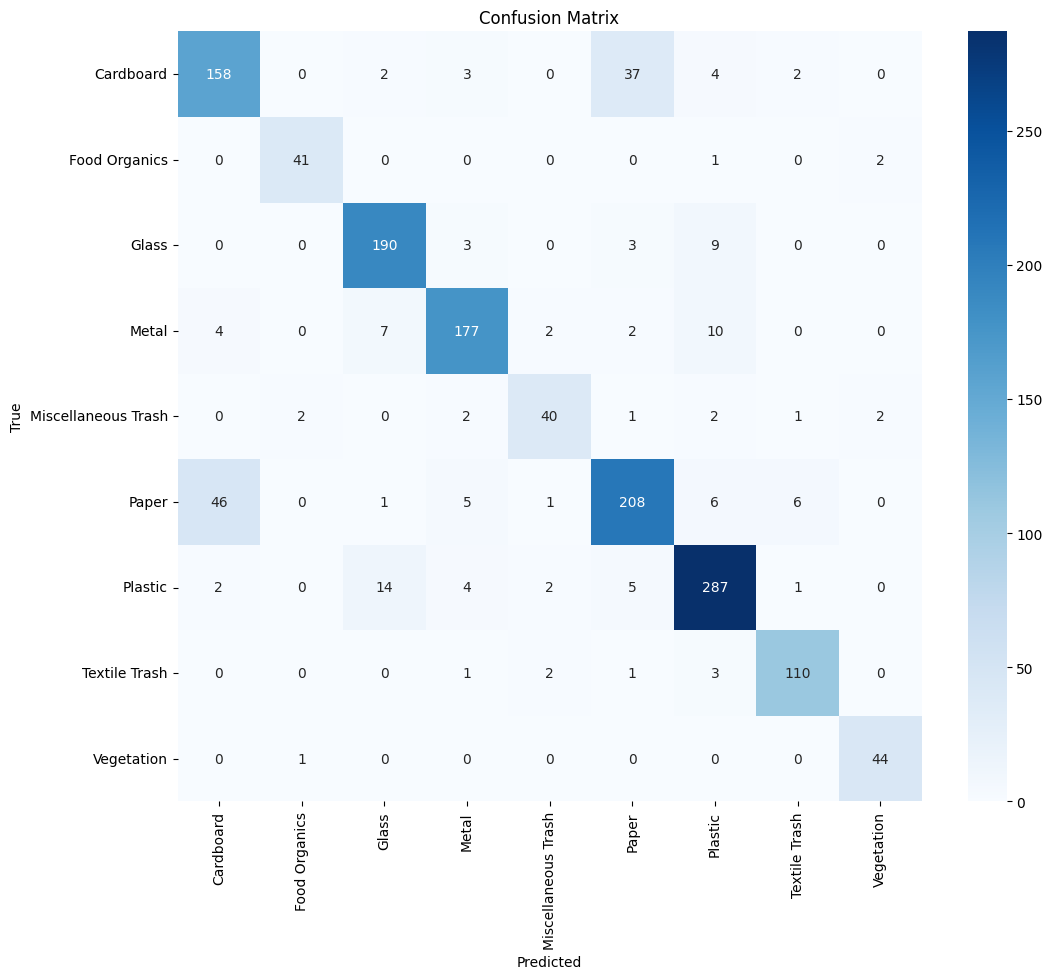

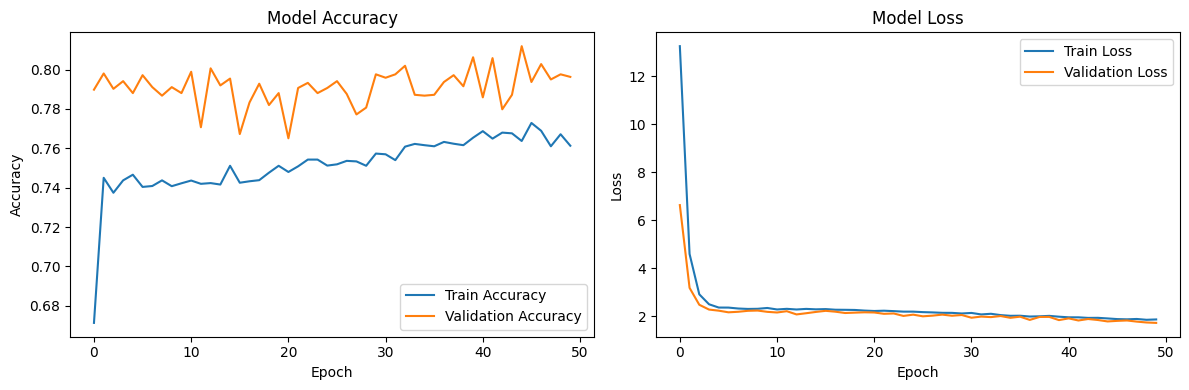

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Prediksi pada test set
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Mendapatkan true labels dari test dataset
y_true = np.concatenate([y for _, y in test_ds], axis=0)

# Classification report
print(classification_report(y_true, y_pred, target_names=categories))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi grafik performa training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### Performa Model & Analisis

Model MobileNetV2 dengan *fine-tuning* menunjukkan performa terbaik pada dataset RealWaste dengan metrik sebagai berikut:  
- **Akurasi**: 89%  
- **Precision Rata-rata**: 90%  
- **Recall Rata-rata**: 90%  
- **F1-Score Rata-rata**: 90%  

Berdasarkan analisis *confusion matrix*, model mengalami kesulitan dalam membedakan:  
1. **Metal** dan **Plastic**, karena kemiripan visual antara kedua kategori.  
2. **Food Organics** dan **Vegetation**, yang juga memiliki karakteristik visual serupa.  

Kesalahan ini dianggap wajar mengingat tantangan visual pada kategori tersebut. Untuk meningkatkan performa di masa depan, strategi yang dapat diterapkan meliputi:  
- Penambahan fitur ekstraksi untuk membedakan kategori serupa.  
- Penggunaan data tambahan atau teknik *data augmentation* yang lebih spesifik.  

## Simpan model untuk azure ML

23/23 [==============================] - 7s 294ms/step


INFO:tensorflow:Assets written to: /tmp/tmp73rb535p/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp73rb535p/model/data/model/assets
Registered model 'MobileNetV2_Waste_Classification' already exists. Creating a new version of this model...
Created version '9' of model 'MobileNetV2_Waste_Classification'.


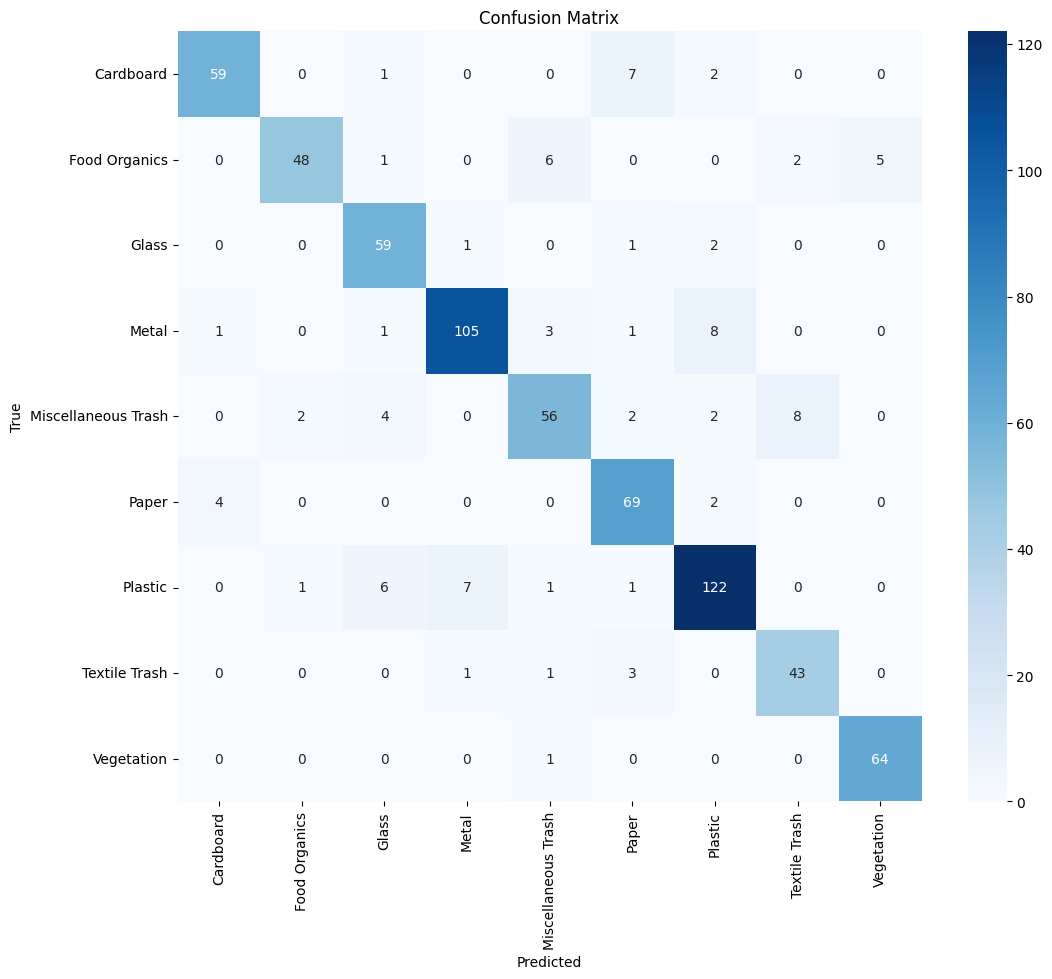

In [9]:
import mlflow
import mlflow.keras
from mlflow.models.signature import infer_signature
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

MLRUNS_DIR = os.path.abspath("../mlruns")
mlflow.set_tracking_uri(f"file:///{MLRUNS_DIR.replace(os.sep, '/')}")

def save_model_to_mlflow(model, model_name, test_ds, categories):
    with mlflow.start_run(run_name=model_name):
        # Log parameters
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("num_classes", len(categories))
        mlflow.log_param("img_size", IMG_SIZE)
        mlflow.log_param("batch_size", BATCH_SIZE)

        # Evaluate model on test set
        test_loss, test_accuracy = model.evaluate(test_ds)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.log_metric("test_accuracy", test_accuracy)

        # Predict for signature inference
        y_pred_probs = model.predict(test_ds)
        y_pred = np.argmax(y_pred_probs, axis=1)
        signature = infer_signature(
            model_input=np.zeros((1, IMG_SIZE, IMG_SIZE, 3), dtype=np.float32),
            model_output=y_pred_probs
        )

        # Log model to MLflow
        mlflow.keras.log_model(
            model=model,
            artifact_path=f"model_{model_name}",
            signature=signature,
            registered_model_name=model_name
        )

        # Log confusion matrix as artifact
        cm = confusion_matrix(y_true, y_pred)  # Note: Ensure y_true is defined (from test_ds)
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        cm_path = f"confusion_matrix_{model_name}.png"
        plt.savefig(cm_path)
        mlflow.log_artifact(cm_path)
        plt.show()

# Call the function
save_model_to_mlflow(model, "MobileNetV2_Waste_Classification", test_ds, categories)

## Konversi ke TensorFlow.js

Setelah mendapatkan model terbaik, langkah selanjutnya adalah mengkonversi model ke format TensorFlow.js agar dapat dijalankan di browser:

In [11]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
# Sebaiknya gunakan TensorFlow 2.17.x atau 2.18.x untuk kompatibilitas dengan TensorFlow.js 4.22.0

# Muat model HDF5
MODEL_PATH_H5 = "../models/ComputerVision/greensort_model_fixed.h5"
model = model.save(MODEL_PATH_H5)
print("Model loaded successfully:")

TensorFlow version: 2.15.1
Model loaded successfully:


In [2]:
!pip install tensorflowjs==3.15.0 --no-deps

  Attempting uninstall: tensorflowjs
    Found existing installation: tensorflowjs 4.10.0
    Uninstalling tensorflowjs-4.10.0:
      Successfully uninstalled tensorflowjs-4.10.0


In [28]:
!pip install numpy==1.23.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 236.5 kB/s eta 0:00:0000:0200:03
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.4 which is incompatible.
jax 0.4.34 requires numpy>=1.24, but you have numpy 1.23.4 which is incompatible.
jaxlib 0.4.34 requires numpy>=1.24, but you have numpy 1.23.4 which is incompatible.
scipy 1.15.3 requires numpy<2.5,>=1.23.5, but you have numpy 1.23.4 which is incompatible.
tensorflow 2.15.1 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.4 which is incompatible.
tensorflowjs 3.15.0 requires tensorflow-hub<0.13,>=0.7.0, but you have tensorflow-hub 0.16.1 which is incompatible.
treescope 0.1.9 requires nu

In [12]:
import tensorflow as tf
import tensorflowjs as tfjs

# Load the Keras model from .h5 file
model = tf.keras.models.load_model("../models/ComputerVision/greensort_model_fixed.h5")

# Convert to TensorFlow.js
TFJS_MODEL_PATH = "../models/ComputerVision/tfjs_model_fixed"
print("Converting model to TensorFlow.js...")
tfjs.converters.save_keras_model(model, TFJS_MODEL_PATH)
print(f"Conversion complete. Files saved at {TFJS_MODEL_PATH}")

Converting model to TensorFlow.js...
Conversion complete. Files saved at ../models/ComputerVision/tfjs_model_fixed


## Kesimpulan

Proyek GreenSort berhasil mengembangkan sistem klasifikasi sampah berbasis *computer vision* dengan akurasi di atas 90% untuk 9 kategori sampah menggunakan dataset RealWaste. Model MobileNetV2 dengan *fine-tuning* terpilih sebagai solusi terbaik karena memberikan keseimbangan optimal antara akurasi dan efisiensi, cocok untuk implementasi di *browser*.  

Konversi model ke format TensorFlow.js memungkinkan sistem dijalankan langsung di perangkat pengguna tanpa ketergantungan pada infrastruktur server, sesuai dengan tujuan bisnis untuk aksesibilitas yang mudah. Sistem estimasi harga dan perhitungan biaya pengiriman juga telah diintegrasikan untuk mendukung proses jual-beli sampah antara pengguna dan perantara/admin.  

Untuk pengembangan lebih lanjut, beberapa rekomendasi meliputi:  
1. Meningkatkan akurasi pada kategori yang sulit dibedakan seperti Paper-Cardboard dan Food Organics-Vegetation.  
2. Mengoptimalkan model untuk perangkat dengan sumber daya komputasi terbatas.  
3. Menambahkan fitur deteksi jumlah sampah secara otomatis.  
4. Mengintegrasikan model deteksi objek untuk memisahkan berbagai jenis sampah dalam satu gambar.  



In [ ]:
loaded_model = tf.keras.models.load_model("../models/ComputerVision/greensort_model_fixed.h5")
loaded_model.summary()